We demonstrated the double descent phenomenon in an artificial dataset. Do you think the same behavior would be visible in a small real life dataset, say the diabetes data from Lesson 2 on decision trees? Training a neural network with one hidden layer and varying numbers of hidden units from 1 to 1000. Do you see the double descent?

We download the data from plotly.

In [17]:
import random

!wget https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv

--2020-07-05 12:37:57--  https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv.2’

diabetes.csv.2      100%[===================>]  23.31K  --.-KB/s    in 0.01s   

2020-07-05 12:37:57 (2.15 MB/s) - ‘diabetes.csv.2’ saved [23873/23873]



Next, we'll manually process the data from its comma separated value (csv) format

In [18]:
with open("diabetes.csv", "r") as f:
    data = f.readlines()
feats = data[0]
feats = feats.replace('\n','')
feats = feats.split(",")
feats = feats[0:(len(feats)-1)]	
alldat = []				
alllabs = []			
for i in range(1,len(data)):	
     line = data[i]		
     line = line.replace('\n','')		
     csvline = line.split(",")		
     alllabs = alllabs + [int(csvline[len(csvline)-1])]
     csvline = [float(csvline[i]) for i in range(len(csvline)-1)]
     alldat = alldat + [csvline]	

We next will create a `trainmask` and use it to create the train, test data.

In [19]:
trainmask = [random.randint(0,2) for i in range(len(alldat))]

traindat = [alldat[i] for i in range(len(alldat)) if trainmask[i]]
trainlabs = [alllabs[i] for i in range(len(alldat)) if trainmask[i]]
testdat = [alldat[i] for i in range(len(alldat)) if not trainmask[i]]
testlabs = [alllabs[i] for i in range(len(alldat)) if not trainmask[i]]

Using scikit-learn, we'll train a variety of NNs, varying in the number of hidden units.

In [43]:
from sklearn.neural_network import MLPClassifier

res = []
us = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900]
# us = [1,5,10,100]
reps = 100
for u in us:
  print(u)
  resu = []
  for rep in range(reps):
    clf = MLPClassifier(hidden_layer_sizes=[u], max_iter = 100000)
    clf.fit(traindat, trainlabs)
    score = clf.score(testdat, testlabs)
    resu += [score]
#    print(score)
  res += [resu]
maxs = [max(resu) for resu in res]
mins = [min(resu) for resu in res]
means = [sum(resu)/len(resu) for resu in res]

1
2
3
4
5
6
7
8
9
10
20
30
40
50
60
70
80
90
100
200
300
400
500
600
700
800
900


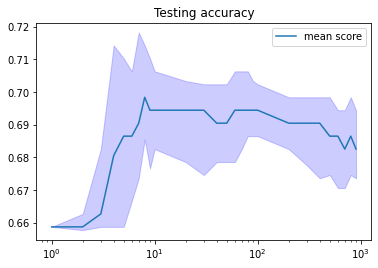

In [44]:
import numpy as np

plt.semilogx()
plt.plot(us, [np.quantile(resu,q=0.50) for resu in res], label='mean score')
plt.fill_between(us, [np.quantile(resu,q=0.25) for resu in res], [np.quantile(resu,q=0.75) for resu in res],color="blue",alpha=0.2)
plt.legend()
plt.title('Testing accuracy')
plt.show()